# Simple Data Analysis and Linear Regression Modelling

## The `housing` problem

We want to predict average house values in suburbs of Boston.

Accesible en https://archive.ics.uci.edu/ml/datasets/Housing

### Attribute Information:

1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per \$10,000 
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. MEDV: Median value of owner-occupied homes in \$1000's

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys
import sklearn as skl
import seaborn as sns

from sklearn.datasets import fetch_openml

## Carga de datos

In [7]:
boston_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', \
                'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', \
                'MEDV']
source = 'openml'
    
if source == 'uci':
    print("reading from the uci site ...")
    data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    df_housing_u = raw_df
    df_housing_u.columns = boston_names
    
elif source == 'cmu':
    print("reading from the cmu site ...")
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

    df_data = pd.DataFrame(data=data)
    df_target = pd.DataFrame(data=target)
    df_housing_c = pd.concat([df_data, df_target], axis=1)
    df_housing_c.columns = boston_names
    
elif source == 'openml':
    print("loading from openml datasets  ...")
    # Fetch the Boston housing dataset
    boston = fetch_openml(name='boston', version=1, parser='auto')
    df_housing_o = pd.DataFrame(data=boston['data'], columns=boston['feature_names']).astype('float')
    df_housing_o['MEDV'] = boston['target']
    
    vars_housing   = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', \
                      'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
    target_housing = ['MEDV']

<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_10706/740217583.py:9: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
/tmp/ipykernel_10706/740217583.py:16: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


loading from openml datasets  ...


## Visualización y correlaciones

### Primer análisis

In [8]:
df_housing = df_housing_o
df_housing.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### Boxplots and histograms

In [9]:
df_housing.std()

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
MEDV         9.197104
dtype: float64

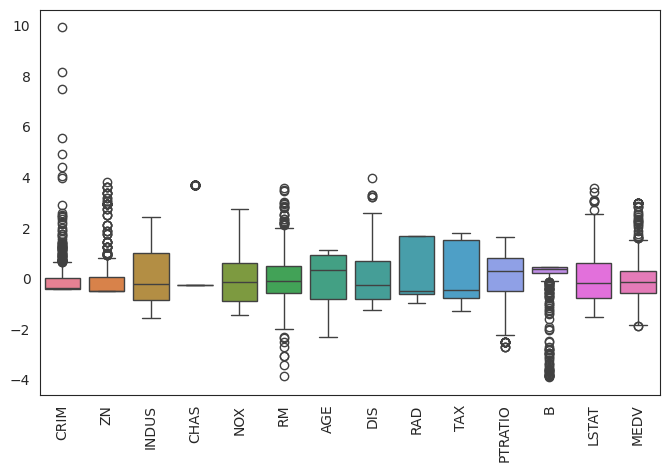

In [10]:
df_housing_normalizado = (df_housing - df_housing.mean()) / df_housing.std() #normalizar para tener rangos uniformes en histogramas

plt.figure( figsize=(8, 5))
sns.set_style("white")
bx_plot = sns.boxplot(data=df_housing_normalizado)
#bx_plot = sns.boxplot(data=df_housing)
plt.xticks(rotation=90)
plt.show()

### Histograms and scatterplots

Plot histograms of groups of 5 variables plus target.

In [11]:
vars_housing   = df_housing.columns[ : -1]
target_housing = df_housing.columns[-1]

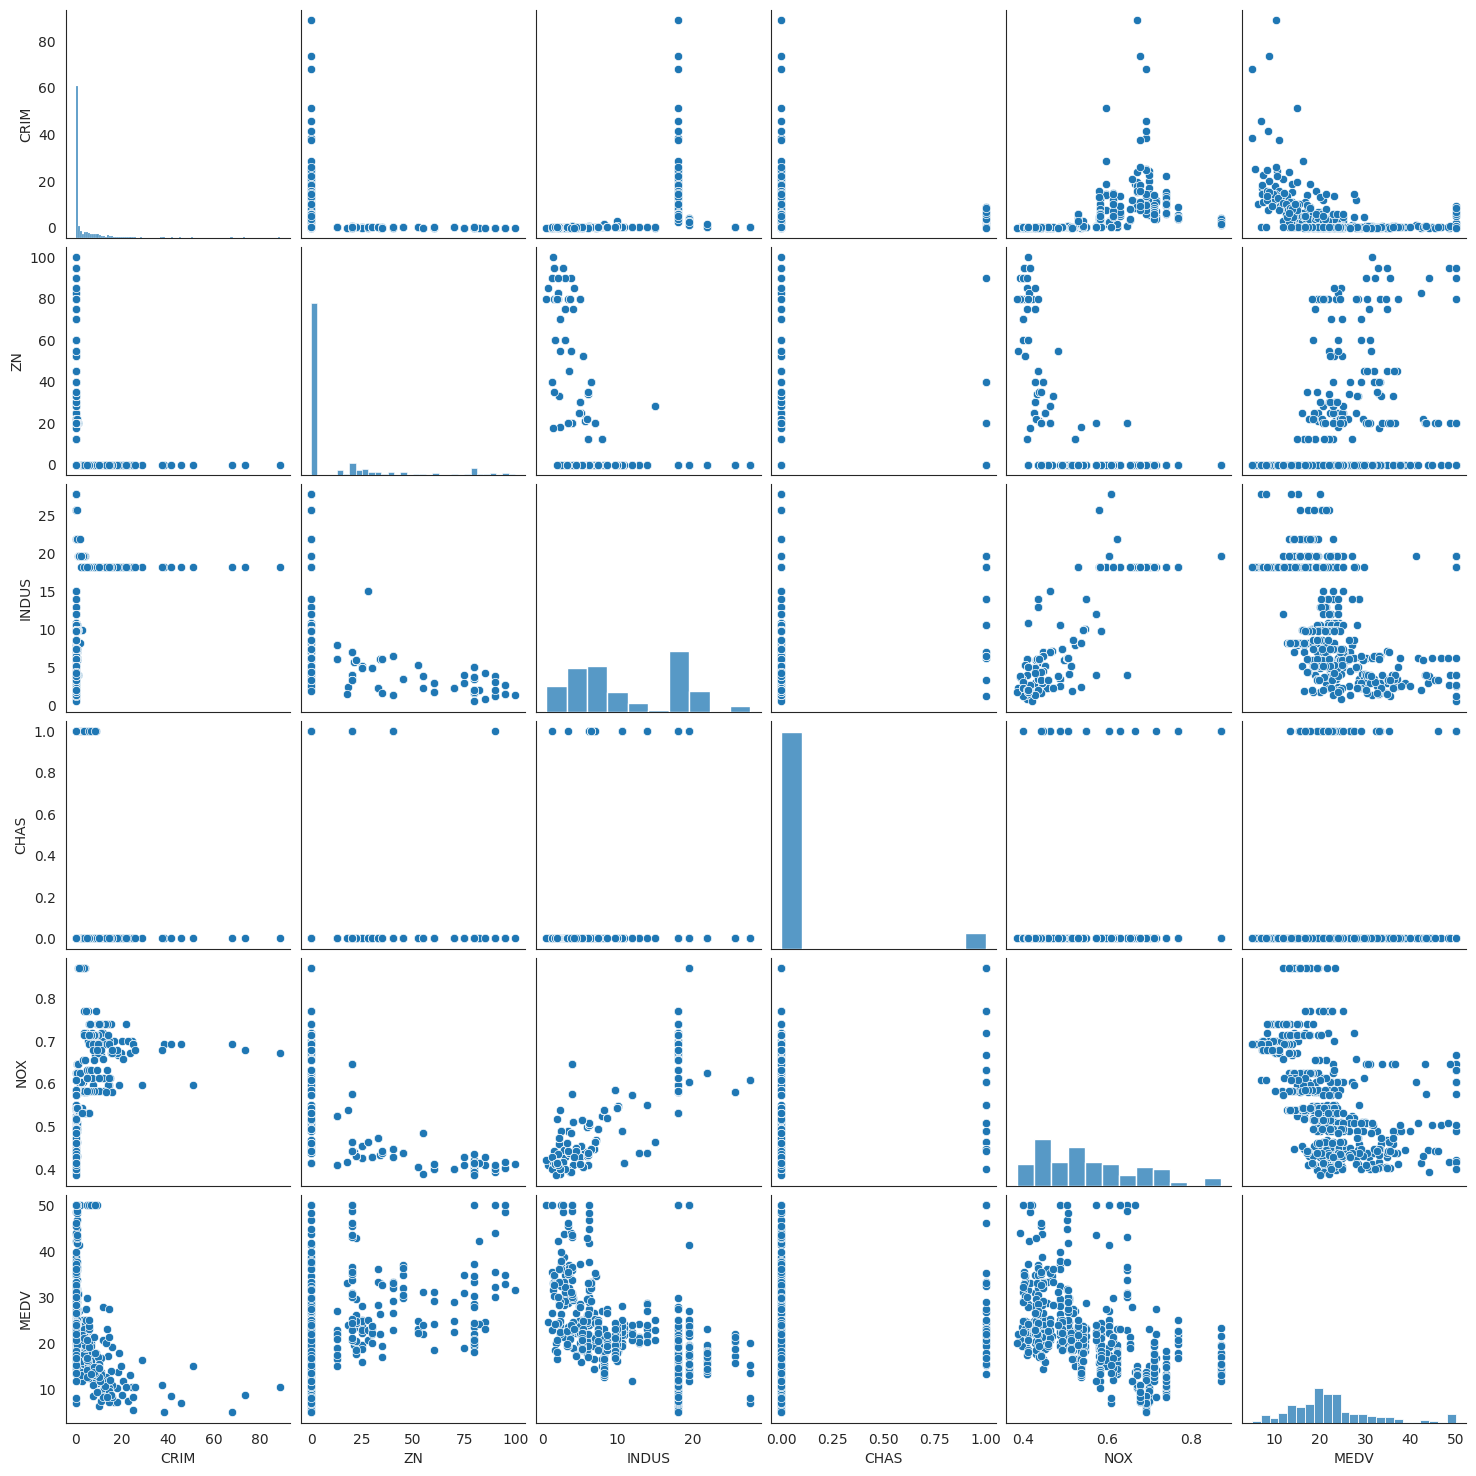

In [12]:
pair_plot = sns.pairplot( df_housing[ list(vars_housing[ : 5]) + [target_housing] ] )
plt.show()

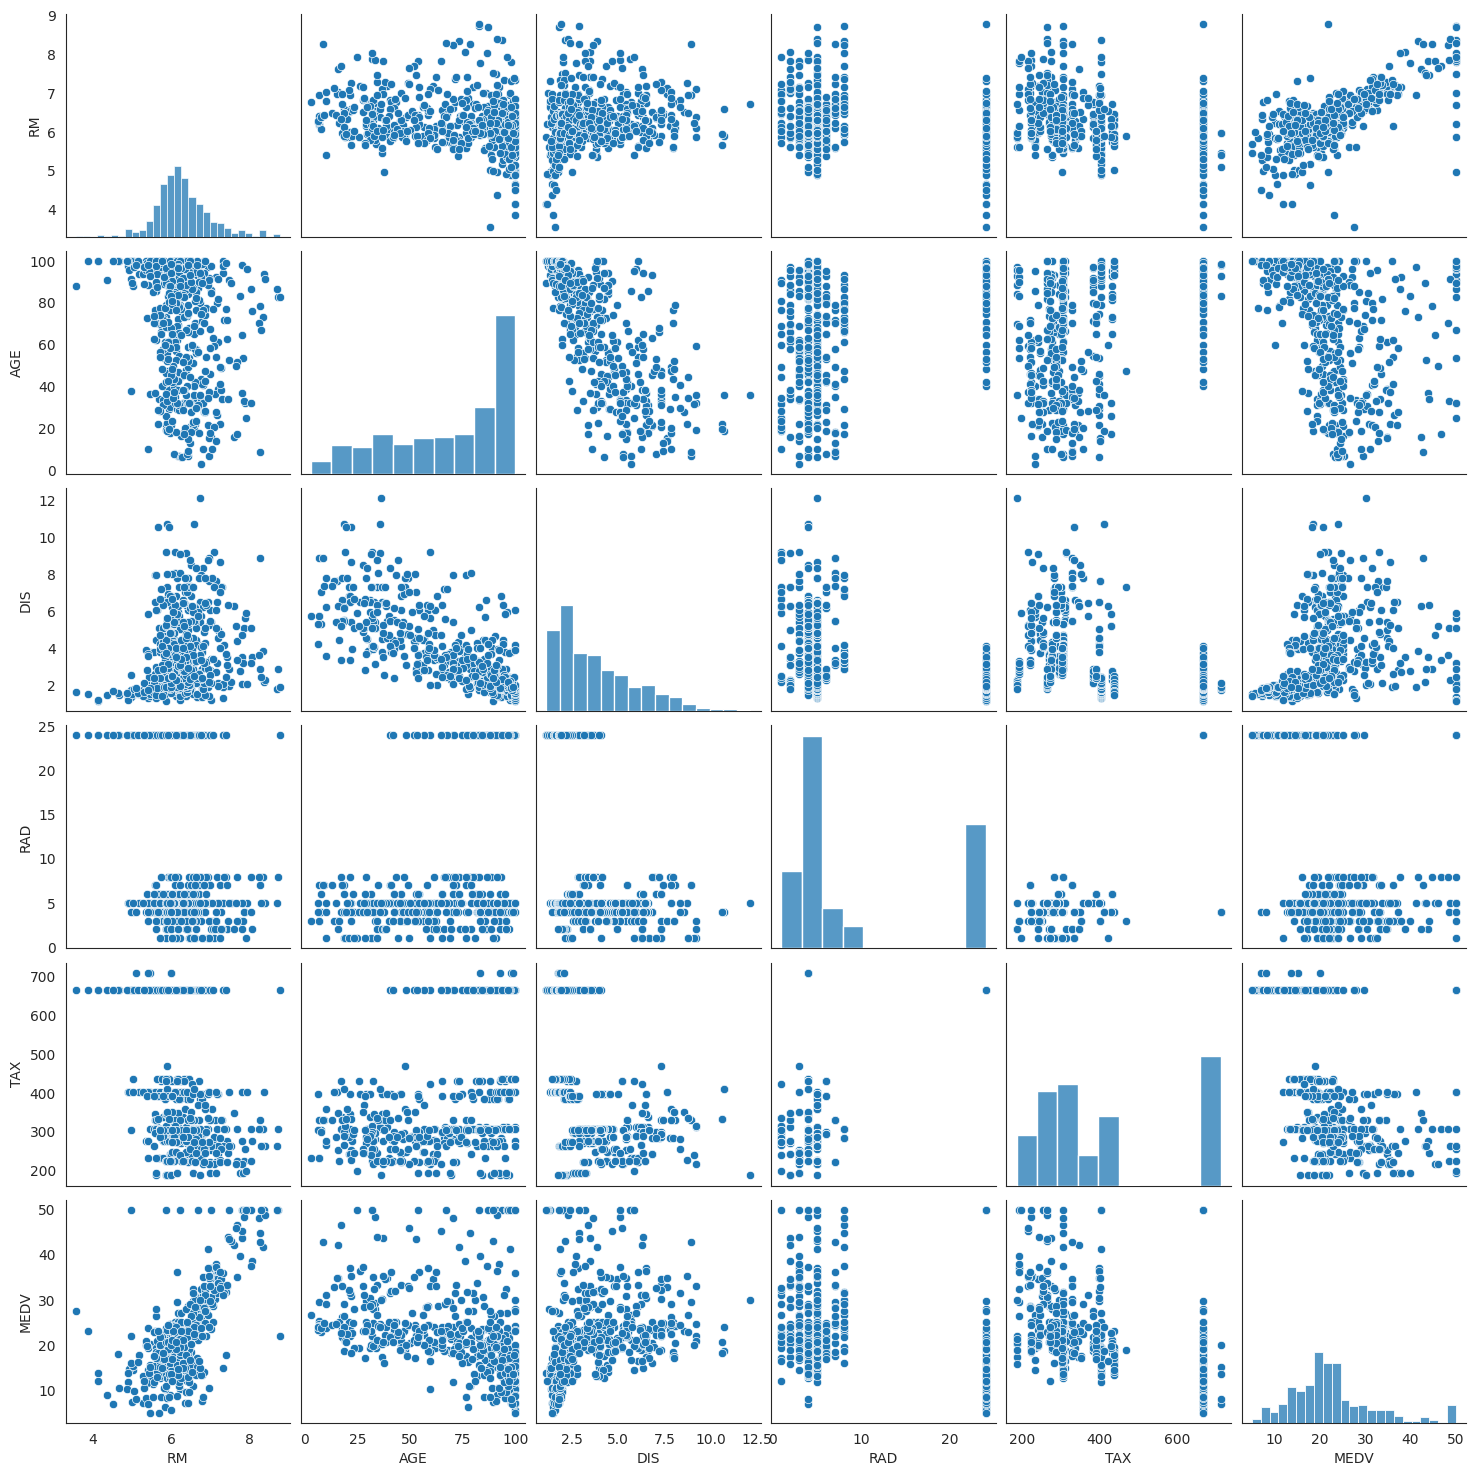

In [13]:
pair_plot = sns.pairplot( df_housing[ list(vars_housing[ 5: 10]) + [target_housing] ] )
plt.show()

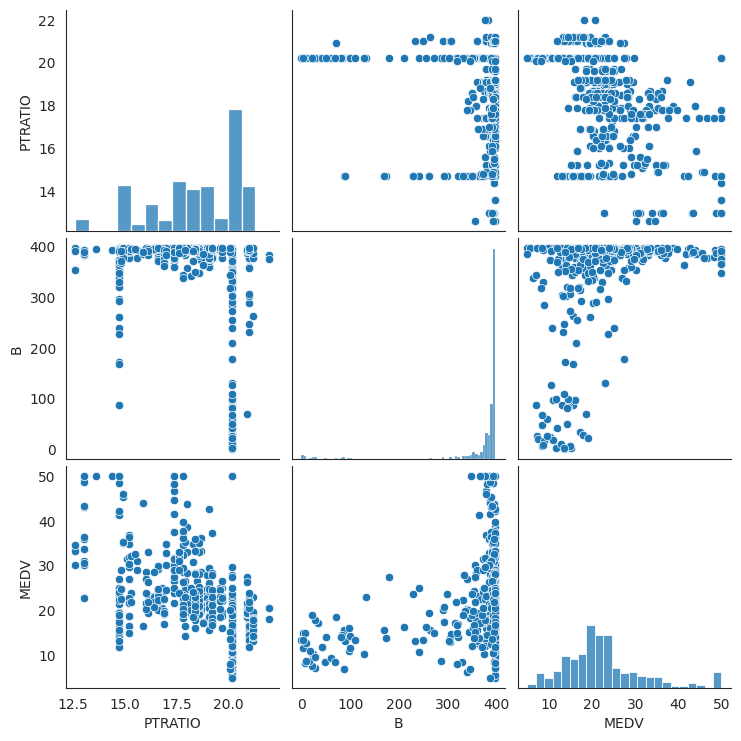

In [14]:
pair_plot = sns.pairplot( df_housing[ list(vars_housing[ 10: -1]) + [target_housing] ] )
plt.show()

### Correlations

In [15]:
df_housing.corr().round(decimals=3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


/tmp/ipykernel_10706/937639840.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cMap = plt.cm.get_cmap("bwr", lut=9)


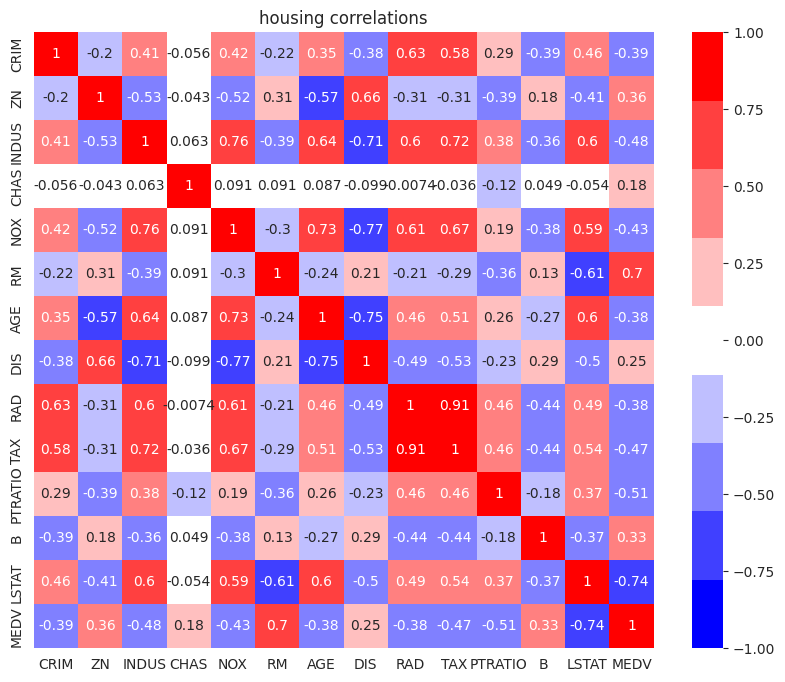

In [16]:
# correlation heatmap
cMap = plt.cm.get_cmap("bwr", lut=9) 

plt.figure( figsize=(10, 8))
plt.title('housing correlations')
_ = sns.heatmap(df_housing.corr().values, vmin=-1., vmax=1., cmap=cMap, 
                annot=True,
                xticklabels=list(df_housing.columns),
                yticklabels=list(df_housing.columns))

In [17]:
print(df_housing.corr()['MEDV'].T)

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64


## Ridge Regression

Just getting started ...

b: 22.532806


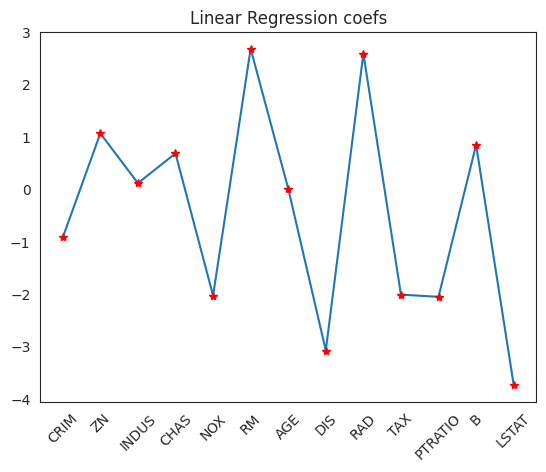

In [18]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

std_sc = StandardScaler()
x = std_sc.fit_transform( df_housing[ vars_housing ] )
y = df_housing[ target_housing ]

lr_m =  Ridge()

#ajuste sobre la muestra completa, sin split train-test
lr_m.fit(x, y)

print("b: %f" % lr_m.intercept_)

nticks = len(lr_m.coef_)

plt.xticks(range(nticks), vars_housing, rotation=45)
plt.title('Linear Regression coefs')
_ = plt.plot(lr_m.coef_, '-', lr_m.coef_, 'r*')

MAE: 3.27


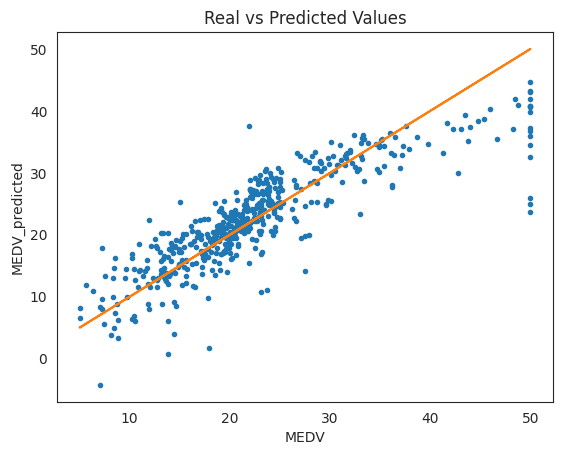

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = lr_m.predict(x)

print("MAE: {0:.2f}".format(mean_absolute_error(y, y_pred)))

plt.title('Real vs Predicted Values')
plt.xlabel('MEDV')
plt.ylabel('MEDV_predicted')
_ = plt.plot(y, y_pred, '.', y, y, '-')

### Finding the optimal `alpha` by CV

 We select the ridge parameter `alpha` by CV

In [20]:
# select alpha in ridge regression by CV
# First iteration to find alpha
from sklearn.model_selection import KFold, GridSearchCV

n_folds = 10

kf = KFold(n_splits=n_folds, shuffle=True, random_state=123)

l_alpha = [10.**k for k in range(-8, 7)]
param_grid = {'alpha': l_alpha}

lr_m = Ridge()
ridge_alpha_search = GridSearchCV(lr_m, 
                                  param_grid=param_grid, 
                                  cv=kf, 
                                  scoring='neg_mean_absolute_error',
                                  refit=False,
                                  return_train_score=True,
                                  n_jobs=2, 
                                  verbose=1)

ridge_alpha_search.fit(x, y)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
             estimator=Ridge(), n_jobs=2,
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0,
                                   100000.0, 1000000.0]},
             refit=False, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

We plot the CV scores against the `alpha` values.

alfa = 10.00
best_cv_mae = 3.361


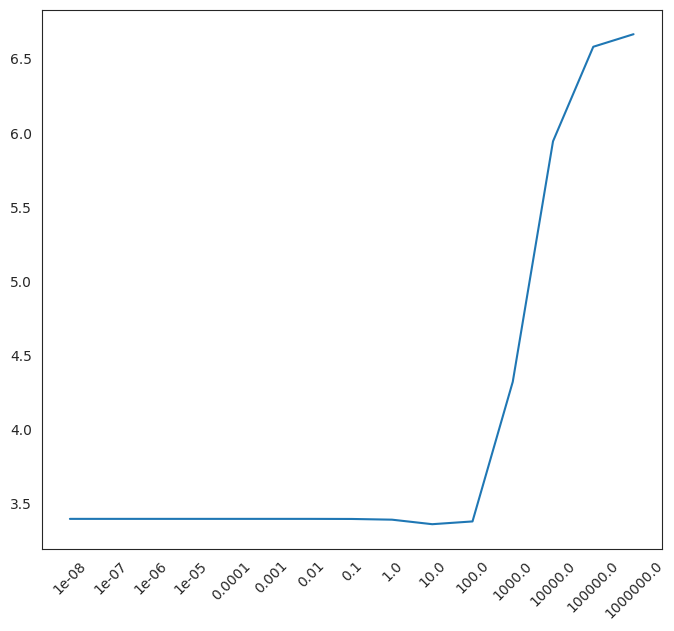

In [21]:
print('alfa = %.2f' % (ridge_alpha_search.best_params_['alpha']))
print('best_cv_mae = %.3f' % (-ridge_alpha_search.best_score_))

nticks = len(l_alpha)
plt.figure(figsize=(8,7))
plt.xticks(range(nticks), l_alpha, rotation=45)
_ = plt.plot( -ridge_alpha_search.cv_results_['mean_test_score'])
plt.show()

In [22]:
#Segunda iteración: recentramos alpha y refinamos la búsqueda
kf = KFold(n_folds, shuffle=True)

l_alpha_2 = [2.**(k/2.) for k in range(0, 20)]
param_grid = {'alpha': l_alpha_2}


lr_m = Ridge()
ridge_alpha_search = GridSearchCV(lr_m, 
                                  param_grid=param_grid, 
                                  cv=kf, 
                                  scoring='neg_mean_absolute_error',
                                  n_jobs=2, verbose=1)

ridge_alpha_search .fit(x, y)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=Ridge(), n_jobs=2,
             param_grid={'alpha': [1.0, 1.4142135623730951, 2.0,
                                   2.8284271247461903, 4.0, 5.656854249492381,
                                   8.0, 11.313708498984761, 16.0,
                                   22.627416997969522, 32.0, 45.254833995939045,
                                   64.0, 90.50966799187809, 128.0,
                                   181.01933598375618, 256.0,
                                   362.03867196751236, 512.0,
                                   724.0773439350247]},
             scoring='neg_mean_absolute_error', verbose=1)

alfa = 45.25
best_cv_mae = 3.333


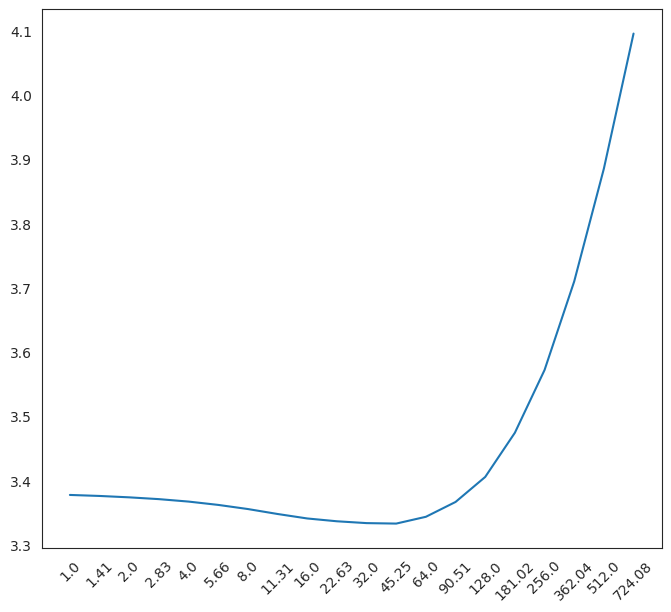

In [23]:
print('alfa = %.2f' % (ridge_alpha_search.best_params_['alpha']))
print('best_cv_mae = %.3f' % (-ridge_alpha_search.best_score_))

plt.figure(figsize=(8,7))
plt.xticks(range(len(l_alpha_2)), np.round(l_alpha_2, 2), rotation=45)
_ = plt.plot( -ridge_alpha_search.cv_results_['mean_test_score'])

### Testing the final model

#### A first test

MAE: 3.2369323018467755


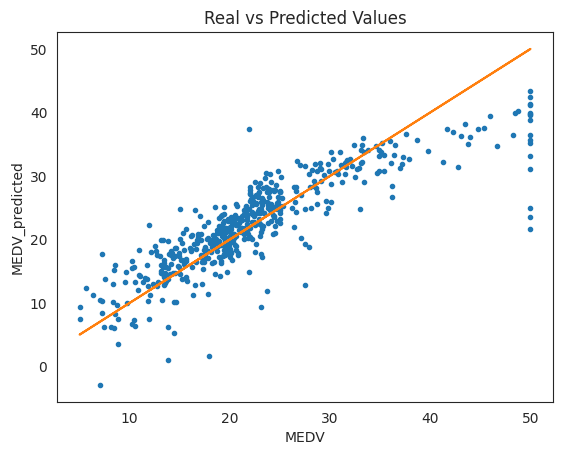

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

best_alpha = ridge_alpha_search.best_params_['alpha']

best_lr = Ridge(alpha=best_alpha)
best_lr.fit(x, y)

y_pred = best_lr.predict(x)

print("MAE:", mean_absolute_error(y, y_pred))

plt.title('Real vs Predicted Values')
plt.xlabel('MEDV')
plt.ylabel('MEDV_predicted')
_ = plt.plot(y, y_pred, '.', y, y, '-')

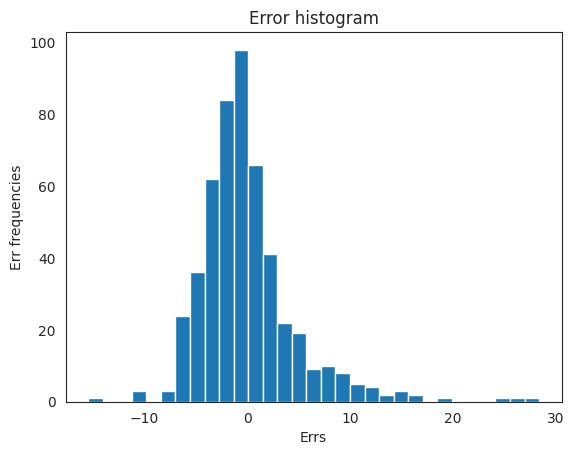

In [25]:
errs = y - y_pred

plt.title("Error histogram")
plt.xlabel("Errs")
plt.ylabel("Err frequencies")
_ = plt.hist(errs, bins=31)

#### CV testing

In [26]:
from sklearn.model_selection import cross_val_score, cross_val_predict

scores = cross_val_score(best_lr, x, y, scoring="neg_mean_absolute_error", cv=kf, n_jobs=2)

In [27]:
scores

array([-3.28269983, -3.47791625, -2.88156944, -3.93804259, -3.24957123,
       -3.64860718, -3.70374981, -3.20016477, -3.32250403, -2.62313567])

In [28]:
print("mae_mean %9.3f" % -scores.mean(), "\tmae_std %9.3f" % scores.std())

mae_mean     3.333 	mae_std     0.369


In [29]:
from scipy.stats import median_abs_deviation

l_preds = []

for i in range(10):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=200+i)

    y_pred =  np.clip(cross_val_predict(best_lr, x, y, cv=kf, n_jobs=2), 5., 50.)
    l_preds.append(y_pred)
    
a_preds = np.array(l_preds).T
mean_y_pred = a_preds.mean(axis=1)
median_y_pred = np.median(a_preds, axis=1)

print("mae_mean_pred {0:9.3f}  ".format(mean_absolute_error(y, mean_y_pred)))
print("mae_median_pred {0:9.3f}".format(mean_absolute_error(y, median_y_pred)))

mae_mean_pred     3.288  
mae_median_pred     3.284


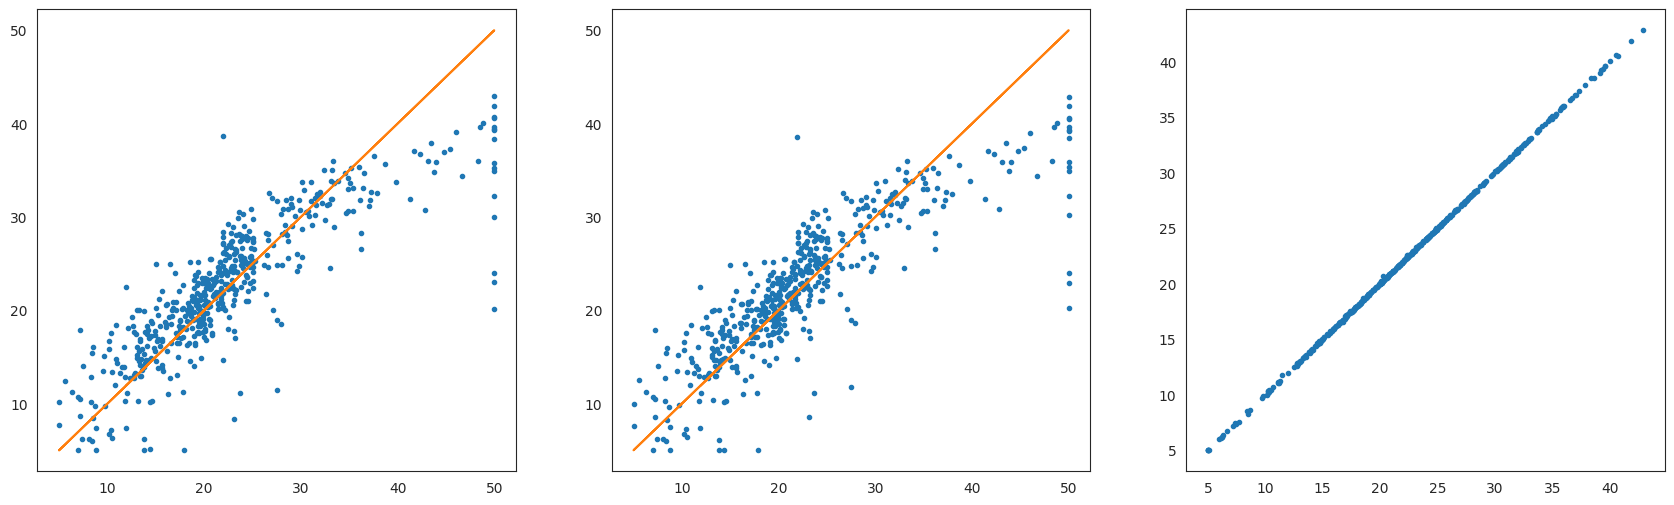

In [30]:
plt.figure(figsize=(21, 6))
plt.subplot(1, 3, 1)
_ = plt.plot(y, mean_y_pred, '.', y, y, '-')

plt.subplot(1, 3, 2)
_ = plt.plot(y, median_y_pred, '.', y, y, '-')

plt.subplot(1, 3, 3)
_ = plt.plot(mean_y_pred, median_y_pred, '.')